# ASSIGNMENT 0 ANKITHANRSC

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### Reading Images using OpenCV

In [2]:
im1 = cv2.imread("../images/img1.jpg")
im2 = cv2.imread("../images/img2.jpg")
im3 = cv2.imread("../images/img3.jpg")
im4 = cv2.imread("../images/img4.jpg")

# cv2.imshow("image 1", im1)
# cv2.waitKey(0)


### Displaying the above read images using matplotlib

(-0.5, 2399.5, 1599.5, -0.5)

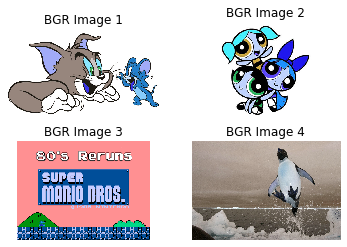

In [3]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(im1)
axs[0, 0].set_title('BGR Image 1')
axs[0, 1].imshow(im2)
axs[0, 1].set_title('BGR Image 2')
axs[1, 0].imshow(im3)
axs[1, 0].set_title('BGR Image 3')
axs[1, 1].imshow(im4)
axs[1, 1].set_title('BGR Image 4')

axs[0, 0].axis("off")
axs[0, 1].axis("off")
axs[1, 0].axis("off")
axs[1, 1].axis("off")

We can observe that the colors of the displayed images are wrong. That is because OpenCV represents RGB images as multi-dimensional NumPy arrays in reverse order. Implying the images above are BGR and not RGB. The BGR images are converted to RGB and displayed in the below segment

#### Rectified display of the images in RGB

(-0.5, 2399.5, 1599.5, -0.5)

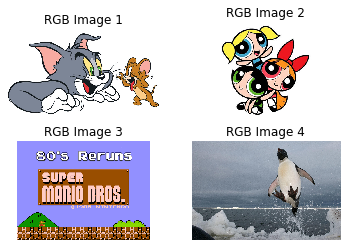

In [4]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('RGB Image 1')
axs[0, 1].imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('RGB Image 2')
axs[1, 0].imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('RGB Image 3')
axs[1, 1].imshow(cv2.cvtColor(im4, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('RGB Image 4')

axs[0, 0].axis("off")
axs[0, 1].axis("off")
axs[1, 0].axis("off")
axs[1, 1].axis("off")

### Function for conversion from RGB to grayscale image with custom channel weight for Red, Green and Blue

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.3, 0.5, 0.2])  
#Arbitrary ratios of 0.3, 0.5 and 0.2 have been assigned for Red, Green and Blue respectively. 

### Conversion from RGB to grayscale and saving using OpenCV

In [6]:
gray1 = rgb2gray(im1)   
cv2.imwrite( "../images/gray1_openCV.jpg", gray1 );

### Height, width and channels of one image

In [7]:
'''Dimensions Display'''
# im1.shape
print('Height:', im1.shape[0],' Width:', im1.shape[1], ' #Channels:', im1.shape[2])

Height: 1080  Width: 1920  #Channels: 3


### Range of values in different channels for the image

In [8]:
'''Range of Values'''
print(im1.reshape((im1.shape[0]*im1.shape[1], 3)).max(axis=0))
print(im1.reshape((im1.shape[0]*im1.shape[1], 3)).min(axis=0))

[255 255 255]
[0 0 0]


The intensity values range from 0-255 for all the channels implying normalized 8-bit images.

### Read, show image through matplotlib

Text(0.5, 1.0, 'Matplotlib imshow')

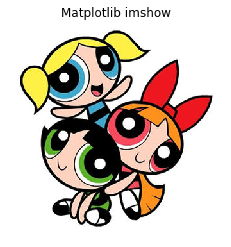

In [9]:
'''Using matplotlib'''
img2 = mpimg.imread("../images/img2.jpg")
plt.imshow(img2)
plt.axis('off')
plt.title('Matplotlib imshow')

### Conversion to grayscale and saving through matplotlib

In [10]:
gray2 = rgb2gray(img2)   
mpimg.imsave( "../images/gray2_matplotlib.jpg", gray2, cmap=plt.get_cmap('gray') );

### Using Scikit-Image

In [11]:
from skimage import io
skimg = io.imread('../images/img3.jpg', plugin='matplotlib')
gray3 = rgb2gray(skimg)
io.imsave("../images/gray3_scikit.jpg", gray3)

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


### Using PIL

In [12]:
from PIL import Image  
pimg = np.array(Image.open("../images/img4.jpg"))
gray4 = rgb2gray(pimg)
gray4Im = Image.fromarray(gray4).convert('RGB')
gray4Im.save("../images/gray4_PIL.jpeg") 